# Project Name : Online Retail Customer Segmentation
### Project Type - Unsupervised ML

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler


In [2]:
online_reatil=pd.read_excel('/content/drive/MyDrive/Data/Online Retail.xlsx')

In [3]:

online_reatil.shape

(541909, 8)

In [4]:
# First 5 rows
online_reatil.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Last 5 rows
online_reatil.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#check the data type of each column
online_reatil.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# 3. Understanding variables


In [103]:
# Dataset Columns
online_reatil.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
column_info = pd.DataFrame({
    'DataType': online_reatil.dtypes,
    'NullValues': online_reatil.isnull().any(),
    'NullCount': online_reatil.isnull().sum(),
    'NullPercentage': (online_reatil.isnull().sum() / len(online_reatil)) * 100
})

In [10]:
print(column_info)

                   DataType  NullValues  NullCount  NullPercentage
InvoiceNo            object       False          0        0.000000
StockCode            object       False          0        0.000000
Description          object        True       1454        0.268311
Quantity              int64       False          0        0.000000
InvoiceDate  datetime64[ns]       False          0        0.000000
UnitPrice           float64       False          0        0.000000
CustomerID          float64        True     135080       24.926694
Country              object       False          0        0.000000


In [104]:
#Display Statistical summary of dataset
online_reatil.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Handling Missing values

In [105]:
#Missing values
print(online_reatil.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [106]:
# Remove all rows with missing values in CustomerID and Description column.
online_reatil.dropna(inplace=True)

In [107]:
online_reatil.shape

(406829, 8)

In [108]:
online_reatil.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [109]:
#Checking the rows containing negative values
online_reatil[online_reatil['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [110]:
# changing the datatype to str
online_reatil['InvoiceNo'] = online_reatil['InvoiceNo'].astype('str')


In [111]:
#Removing the rows from InvoiceNo that contain C
retail_df = online_reatil[~online_reatil['InvoiceNo'].str.contains('C')]

In [112]:
retail_df.shape

(397924, 8)

In [113]:
# Checking how many values are present for unitprice==0
len(online_reatil[online_reatil['UnitPrice']==0])

40

In [114]:
#taking unit price greater than 0
retail_df = retail_df[retail_df['UnitPrice']>0]

In [115]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [116]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [117]:
retail_df.shape

(397884, 8)

# Feature Engineering

In [118]:
# Converting InvoiceDate to datetime.To check whether the InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [119]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [120]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [121]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [122]:
# Calculating total column from quantity and unit price
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [123]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# EDA(Exploratory Data Analysis)

In [124]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

# Top 10 products in terms of description

In [125]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


In [126]:
color =sns.color_palette("tab10")

<ipython-input-127-ef5672ff7d97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'],palette=color)


Text(0.5, 1.0, 'Top 10 products')

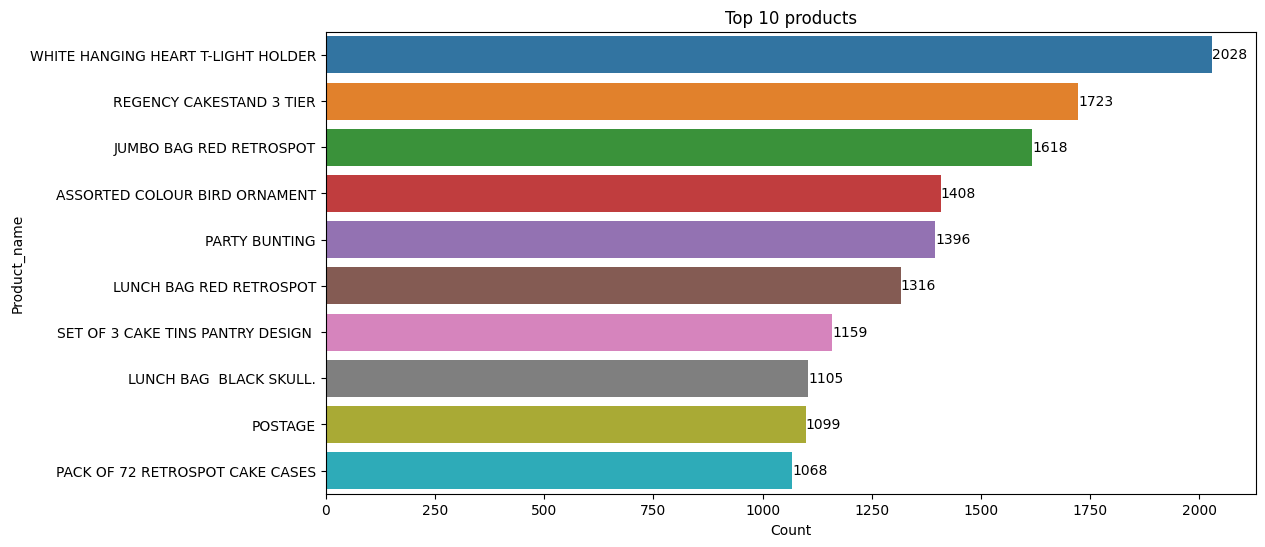

In [127]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'],palette=color)
for index, value in enumerate(top_10_product['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.title('Top 10 products')

# Bottom 10 items in terms of description


In [128]:
# Bottom 10 productsin terms of description
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product


,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


<ipython-input-129-0bedb5b39e89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'],palette=color)


Text(0.5, 1.0, 'Bottom 10 products')

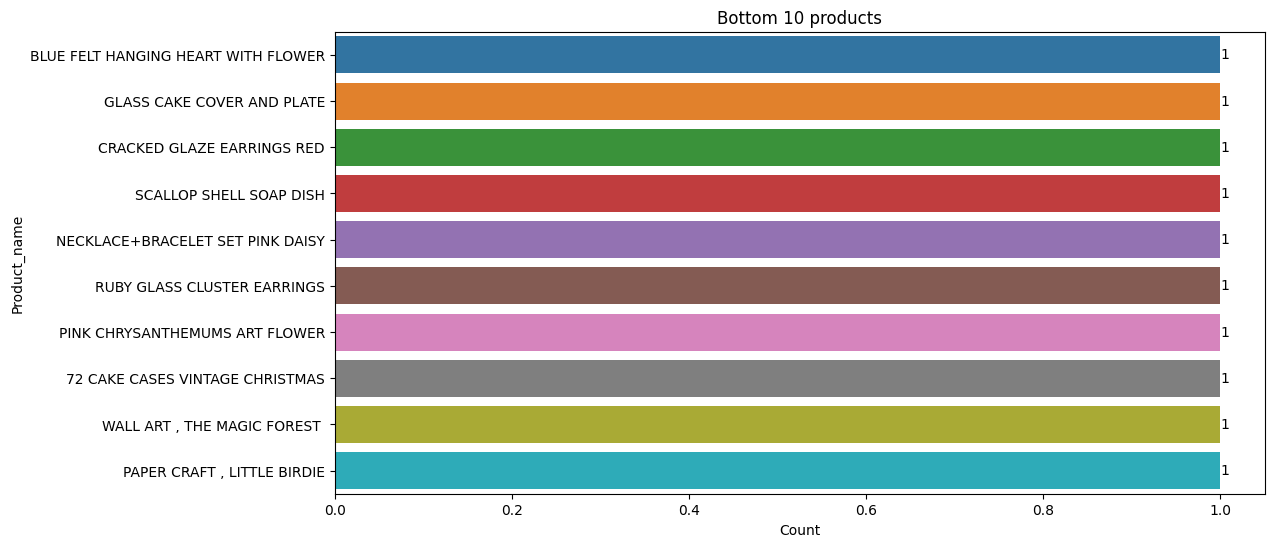

In [129]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'],palette=color)
for index, value in enumerate(bottom_10_product['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.title('Bottom 10 products')

# Top 10 items in terms of StockCode.


In [130]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


<ipython-input-131-59337ef0f81d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'],palette=color)


Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

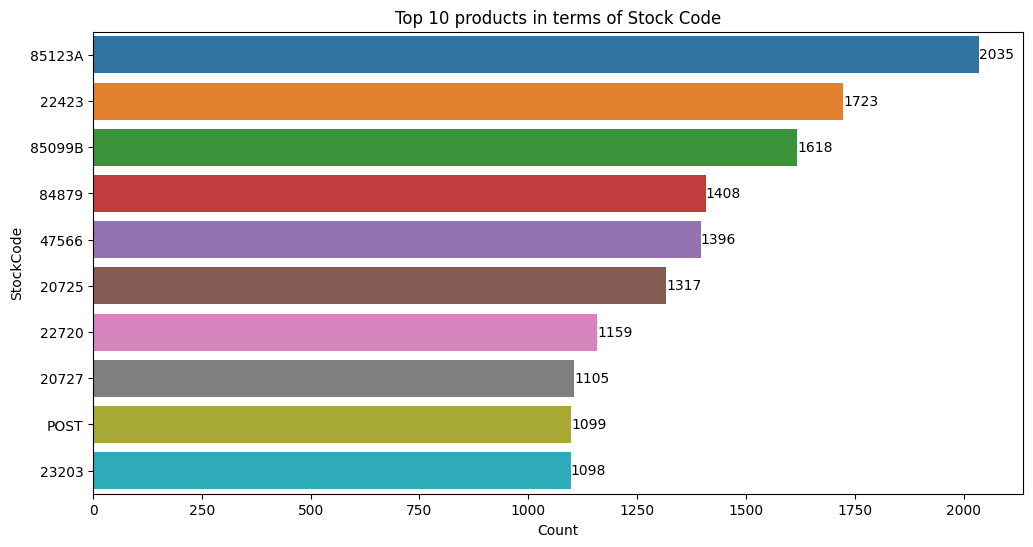

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'],palette=color)
for index, value in enumerate(top_10_StockCodes['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.title('Top 10 products in terms of Stock Code')

# Top 10 Customers

In [132]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841,7847
1,14911,5675
2,14096,5111
3,12748,4595
4,14606,2700
5,15311,2379
6,14646,2076
7,13089,1818
8,13263,1677
9,14298,1637


<ipython-input-133-0bfdac2e33a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'],palette=color)


Text(0.5, 1.0, 'Top 10 frequent Customers.')

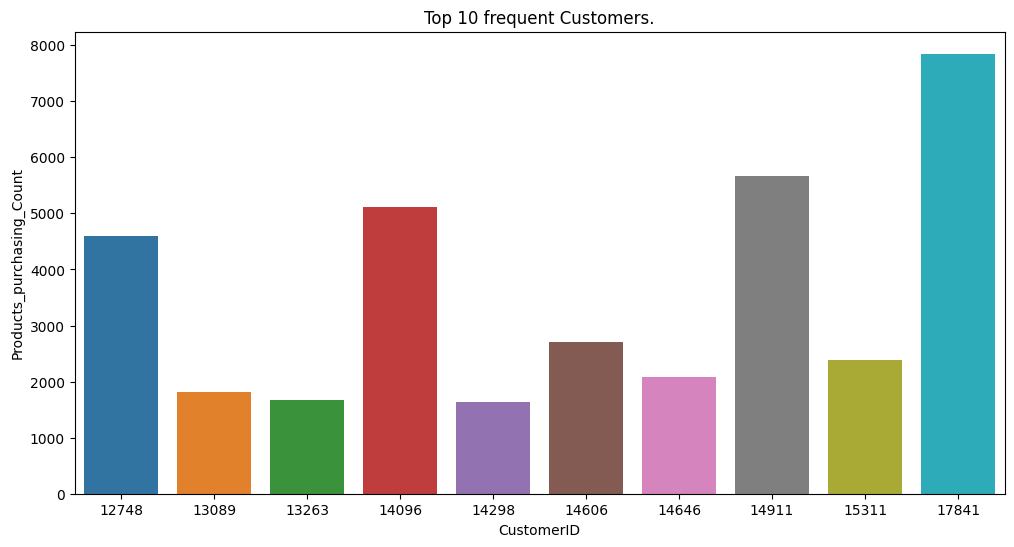

In [133]:
# Top 10 frequent Customers
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'],palette=color)
plt.title('Top 10 frequent Customers.')

# Top 5 countriess with number of customers

In [134]:
countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


<ipython-input-135-e5ab67ab6a1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries['Country'].head(5),y=countries['Customer_count'].head(5),palette=color)
<ipython-input-135-e5ab67ab6a1d>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=countries['Country'].head(5),y=countries['Customer_count'].head(5),palette=color)


Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

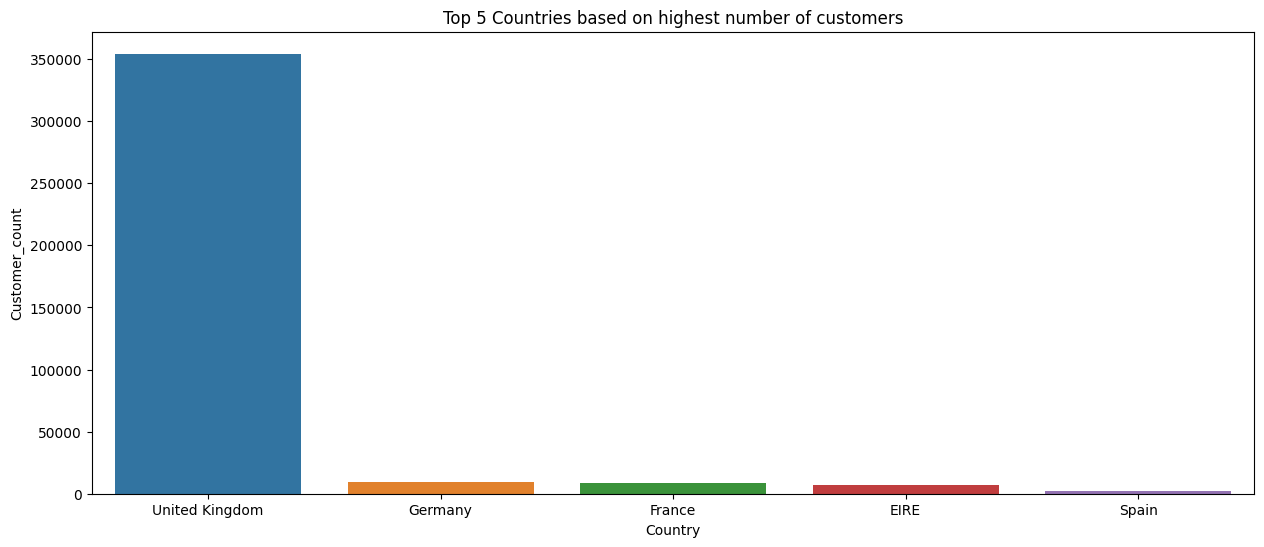

In [135]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=countries['Country'].head(5),y=countries['Customer_count'].head(5),palette=color)
plt.title('Top 5 Countries based on highest number of customers')

<ipython-input-136-63b4c30ed698>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries['Country'].tail(5),y=countries['Customer_count'].tail(5),palette=color)
<ipython-input-136-63b4c30ed698>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=countries['Country'].tail(5),y=countries['Customer_count'].tail(5),palette=color)


Text(0.5, 1.0, 'Bottom 5 Countries based on least number of customers ')

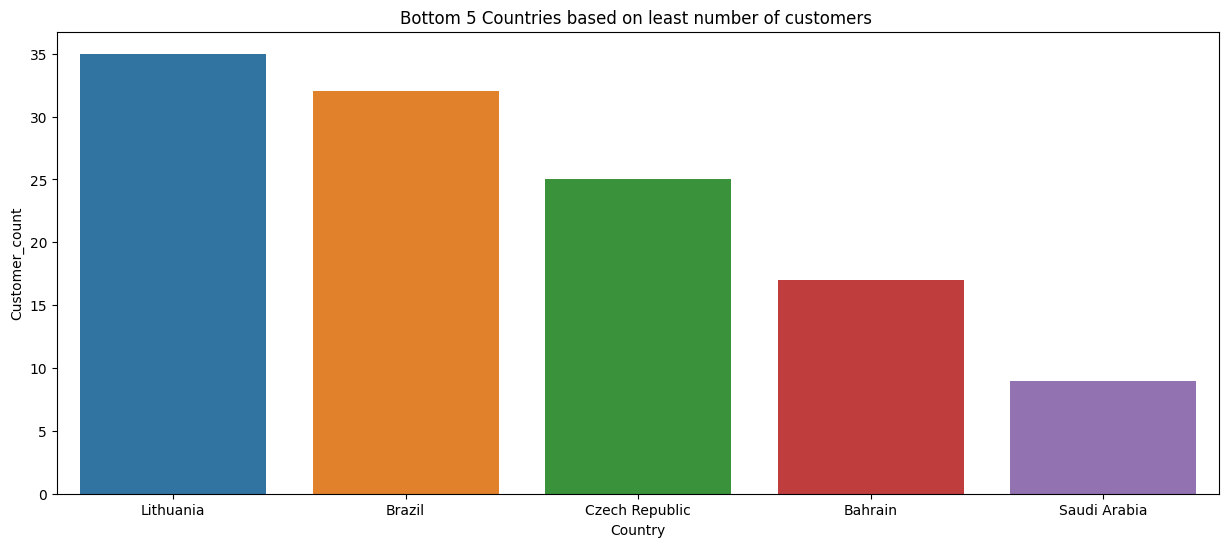

In [136]:
# Bottom 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=countries['Country'].tail(5),y=countries['Customer_count'].tail(5),palette=color)
plt.title('Bottom 5 Countries based on least number of customers ')

# Month-Wise Sale


In [137]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


<ipython-input-138-8a9ae6e08510>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'],palette=color)
<ipython-input-138-8a9ae6e08510>:3: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'],palette=color)


Text(0.5, 1.0, 'Sales count in different Months ')

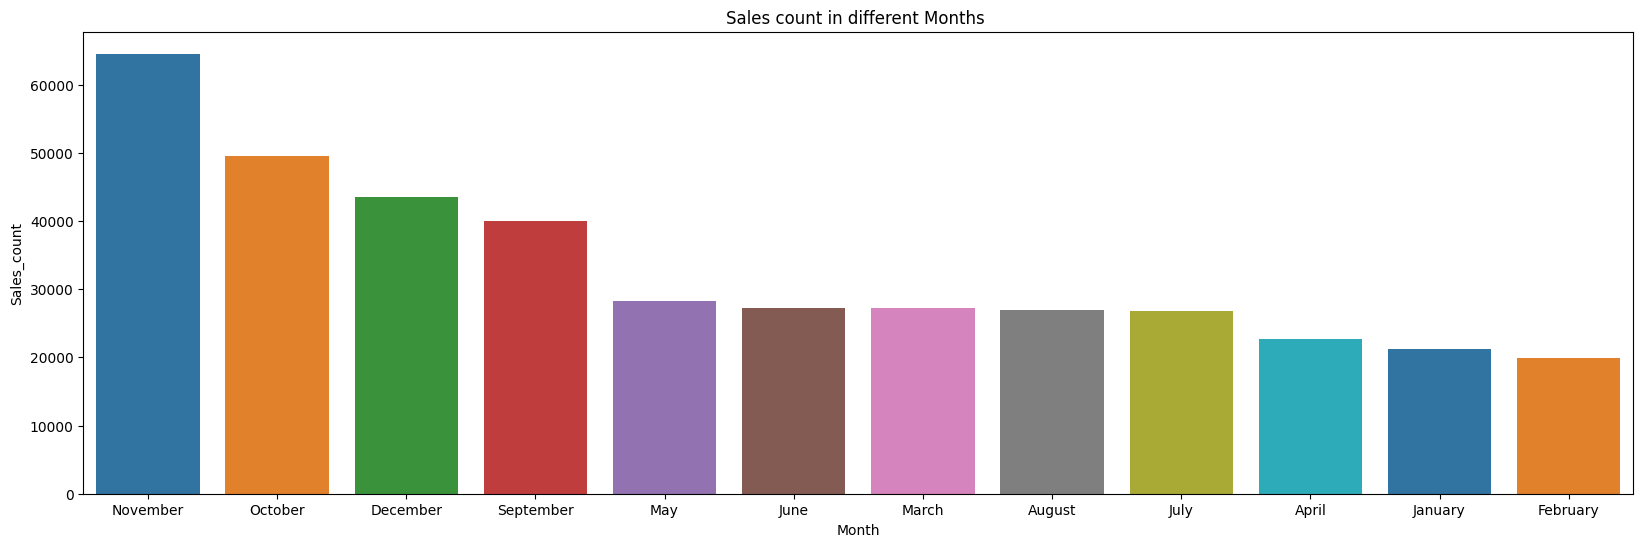

In [138]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'],palette=color)
plt.title('Sales count in different Months ')

# Day-wise Sale

In [139]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


<ipython-input-140-f55f5954ad6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'],palette=color)
<ipython-input-140-f55f5954ad6c>:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'],palette=color)


Text(0.5, 1.0, 'Sales count on different Days ')

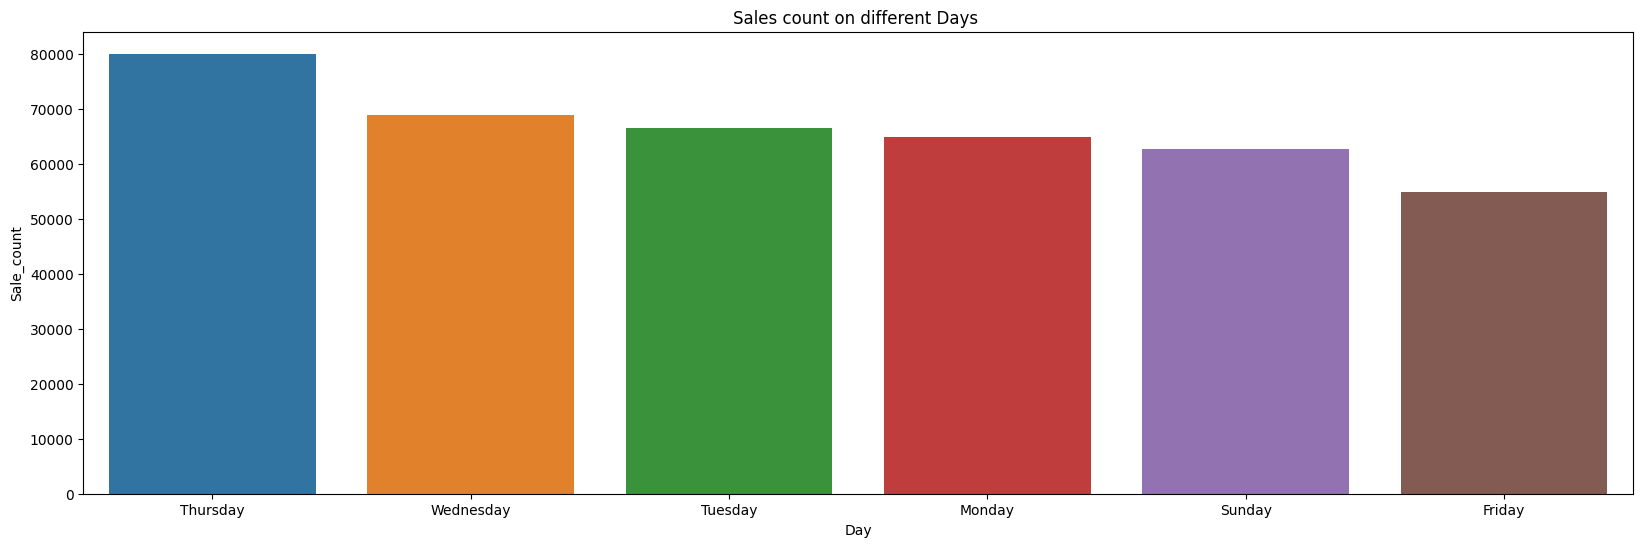

In [140]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'],palette=color)
plt.title('Sales count on different Days ')

# Hour-wise Sale

In [141]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [142]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [143]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [144]:
sales_timing=retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


<ipython-input-145-1b708e214c75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'],palette=color)
<ipython-input-145-1b708e214c75>:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'],palette=color)


Text(0.5, 1.0, 'Sales count in different day timings')

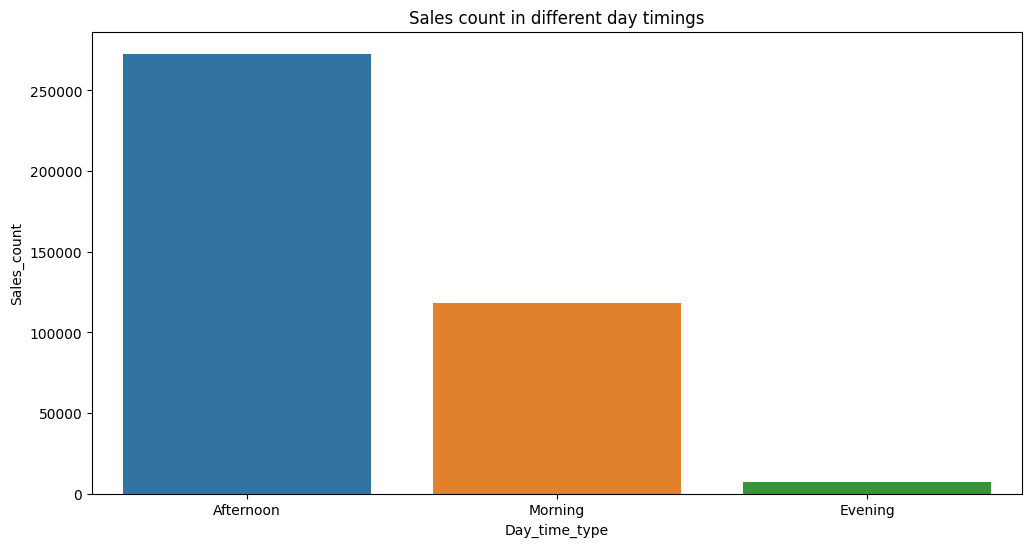

In [145]:
# Sales count in different day timings.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'],palette=color)
plt.title('Sales count in different day timings')

# Average Purchase Per Person

In [146]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [147]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
avg_amount

,CustomerID,Avg_amount_per_customer
0,12346,77183.600000
3008,16446,56157.500000
2011,15098,13305.500000
2502,15749,4453.430000
2087,15195,3861.000000
...,...,...
3590,17254,2.432500
697,13271,2.264375
990,13684,2.241000
3995,17816,2.150588


<ipython-input-148-022f381c022a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15),palette=color)
<ipython-input-148-022f381c022a>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15),palette=color)


Text(0.5, 1.0, 'Average amount spent by each Customer')

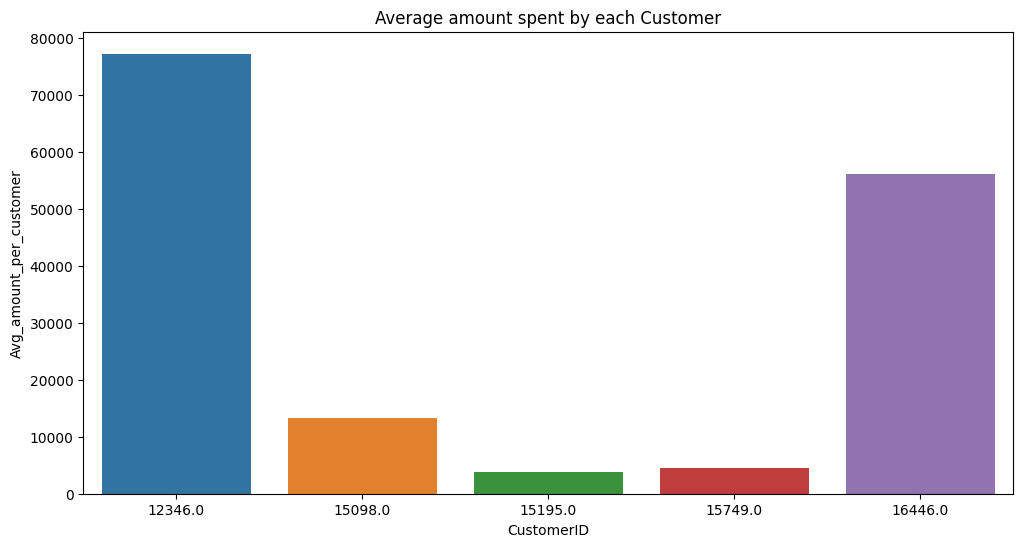

In [148]:
# Average amount spent by each Customer.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15),palette=color)
plt.title('Average amount spent by each Customer')

# Model Buliding

In [149]:
# Create a new feature Date
retail_df['Date'] = retail_df['InvoiceDate'].dt.date

In [150]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30,Morning,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00,Morning,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34,Morning,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,12,50,December,Friday,10.20,Afternoon,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,12,50,December,Friday,12.60,Afternoon,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50,December,Friday,16.60,Afternoon,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50,December,Friday,16.60,Afternoon,2011-12-09


# RFM Analysis
 The **RFM** model is a marketing analysis framework used to segment and analyze customer behavior based on three key factors: Recency, Frequency, and Monetary Value. This model helps businesses better understand and target their customers by categorizing them into different segments based on their transaction history. The RFM model is widely used in e-commerce, retail, and other industries to tailor marketing strategies and improve customer engagement. Here's a brief overview of the three components:


* Recency (R): This refers to how recently a customer has made a
  purchase. Customers who have made a purchase more recently are considered more valuable, as their behavior is more current and reflective of their current needs and preferences.

* Frequency (F): This measures how often a customer makes a purchase. Customers who make frequent purchases are often more engaged and loyal to the brand. Understanding the frequency of purchases helps businesses identify their most loyal customers.

* Monetary Value (M): This represents the total monetary value of a customer's purchases. Customers who have spent more money are considered more valuable to the business. Analyzing the monetary value helps identify high-value customers who contribute significantly to the overall revenue.

# Recency
Recency = Latest InvoiceDate - Last InoviceData

In [151]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = retail_df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()


,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [152]:
# Get the latest date in the dataset
latest_date = retail_df['Date'].max()

print(latest_date)

2011-12-09


In [153]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310
5,12352,2011-11-03,36
6,12353,2011-05-19,204
7,12354,2011-04-21,232
8,12355,2011-05-09,214
9,12356,2011-11-17,22


In [154]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


# Frequency

In [155]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
5,12352,85
6,12353,4
7,12354,58
8,12355,13
9,12356,59


#  Monetary Value

In [156]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = retail_df.groupby('CustomerID')['TotalAmount'].sum().reset_index().rename(columns = {'TotalAmount': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [157]:
# Merge the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()


,CustomerID,Recency,Frequency
0,12346,325,1
1,12347,2,182
2,12348,75,31
3,12349,18,73
4,12350,310,17


In [158]:
# Merge the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


# Customer segments with RFM Model

* The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

* Quantiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [159]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])

quantiles


,Recency,Frequency,MonetaryValue
0.25,17.00,17.0,307.415
0.50,50.00,41.0,674.485
0.75,141.75,100.0,1661.740


In [160]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 17.0,
  'Frequency': 17.0,
  'MonetaryValue': 307.41499999999996},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 674.485},
 0.75: {'Recency': 141.75,
  'Frequency': 100.0,
  'MonetaryValue': 1661.7400000000002}}

# RFM Table & Score

In [161]:
# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4,0,-1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))


In [162]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346,325,1,77183.60,1,1,4
1,12347,2,182,4310.00,4,4,4
2,12348,75,31,1797.24,2,2,4
3,12349,18,73,1757.55,3,3,4
4,12350,310,17,334.40,1,1,2


In [163]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346,325,1,77183.60,1,1,4,114
1,12347,2,182,4310.00,4,4,4,444
2,12348,75,31,1797.24,2,2,4,224
3,12349,18,73,1757.55,3,3,4,334
4,12350,310,17,334.40,1,1,2,112


# Interpretation:

* Best RecencyScore = 4 (most recently purchase)
* Best FrequencyScore = 4 (most frequently purchase)
* Best MonetaryScore = 4 (who spent the most)
* If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
* If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
* If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
* Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
* Higher the RFMScore, more valuable the customer is.

In [164]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False)
rfm_df2.head(10)



,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1689,14646,1,2076,280206.02,4,4,4,444
4201,18102,0,431,259657.30,4,4,4,444
3728,17450,8,337,194550.79,4,4,4,444
1879,14911,1,5675,143825.06,4,4,4,444
1333,14156,9,1400,117379.63,4,4,4,444
3771,17511,2,963,91062.38,4,4,4,444
3176,16684,4,277,66653.56,4,4,4,444
1289,14096,4,5111,65164.79,4,4,4,444
996,13694,3,568,65039.62,4,4,4,444
2176,15311,0,2379,60767.90,4,4,4,444


In [165]:
# Categorising customer or making customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 440
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  103
Lost Customers:  21
Lost Cheap Customers:  385


In [166]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


# Feature Correlations

In [167]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206180,-0.122241
Frequency,-0.206180,1.000000,0.422129
MonetaryValue,-0.122241,0.422129,1.000000


<Axes: >

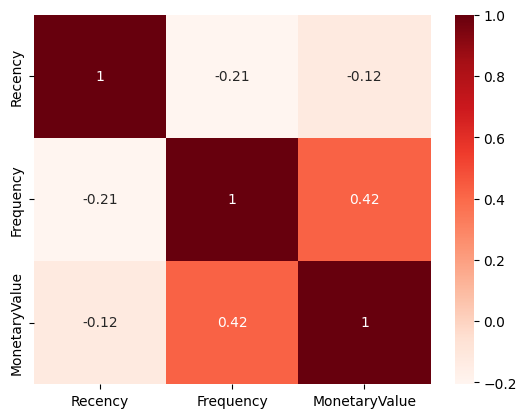

In [168]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')


*  I picked this chart to show the correlation between different variables.

*  The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

*  The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

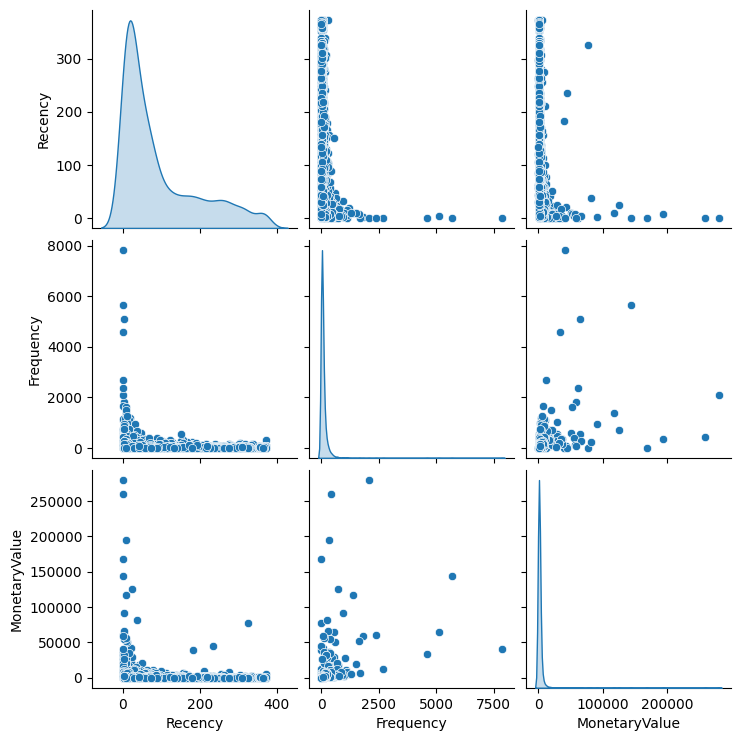

In [169]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');

In [170]:
# calculate the skewness of each feature
rfm_data.skew()

Recency           1.245826
Frequency        18.106165
MonetaryValue    19.324953
dtype: float64



*   The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

* We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.
  List item



# Data Normalization



In [171]:
# Calculate the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [172]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()


,Monetary,Recency,Frequency
CustomerID,,,
12346,11.253944,5.784133,0.000000
12347,8.368716,0.741937,5.204007
12348,7.494063,4.318821,3.433987
12349,7.471733,2.895912,4.290459
12350,5.812637,5.736895,2.833213


**Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**



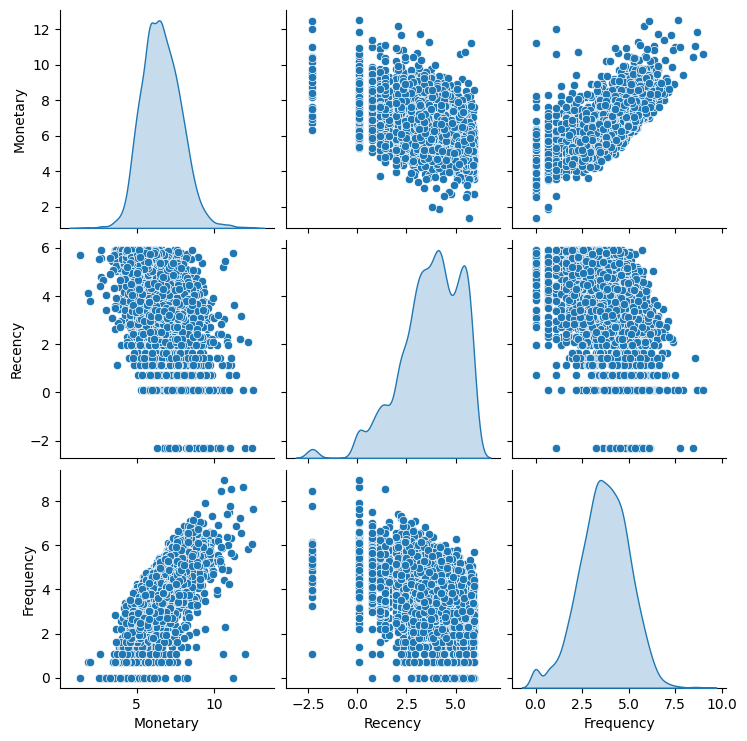

In [173]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde');

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [174]:
# Calculate the skewness of each feature in the data after data normalization
log_data.skew()

Monetary     0.382265
Recency     -0.869633
Frequency   -0.218240
dtype: float64

# Correlation Heatmap after Data Normalization

<Axes: >

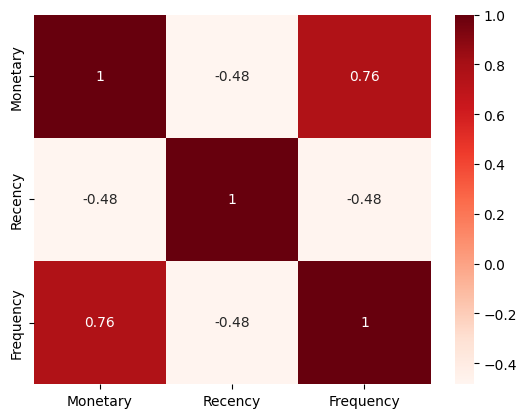

In [185]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

The correlation between Monetary and Frequency is now stronger.



In [186]:
# Assign the normalized data to a variable "X"
X = log_data

# Data Scaling

In [187]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

# ML Model Implementation

### K-Means Implementation



*  One of the common challenges when working with k-means is the need to specify the number of clusters beforehand. Determining the appropriate number of clusters is not always straightforward, and it can be difficult to deduce from the data alone. To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.

*  The Silhouette Coefficient measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity). By computing the silhouette coefficient for each data point, we can gauge how well it aligns with its assigned cluster. A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.

*  Another method that can be used to determine the optimal number of clusters is the Elbow method. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid). The plot often resembles an "elbow" shape, and the number of clusters at the "elbow" is considered a good choice for the optimal cluster count.




#  K-Means with silhouette_score

In [188]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.308


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.277


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.276


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters: 0.266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.263


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 9 clusters: 0.249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters: 0.262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 11 clusters: 0.256


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 12 clusters: 0.259


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 13 clusters: 0.259


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 14 clusters: 0.262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 15 clusters: 0.260


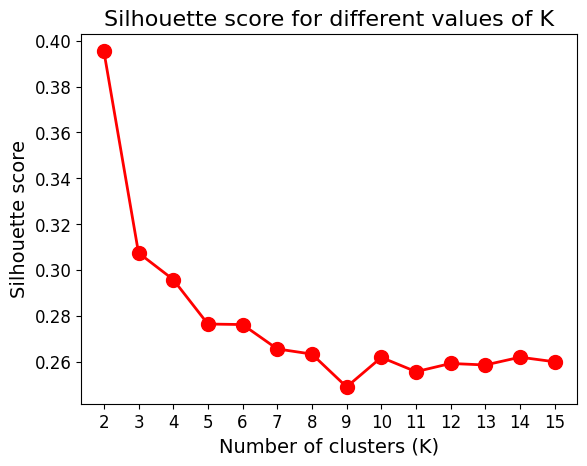

In [189]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The best silhouette score obtained is when the number of clusters is 2.

In [190]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [191]:
# Centers of the clusters(coordinates)
centers = kmeans.cluster_centers_
centers

array([[ 0.5305751 , -0.63811658, -0.63893826],
       [-0.67699823,  0.81421801,  0.81526645]])

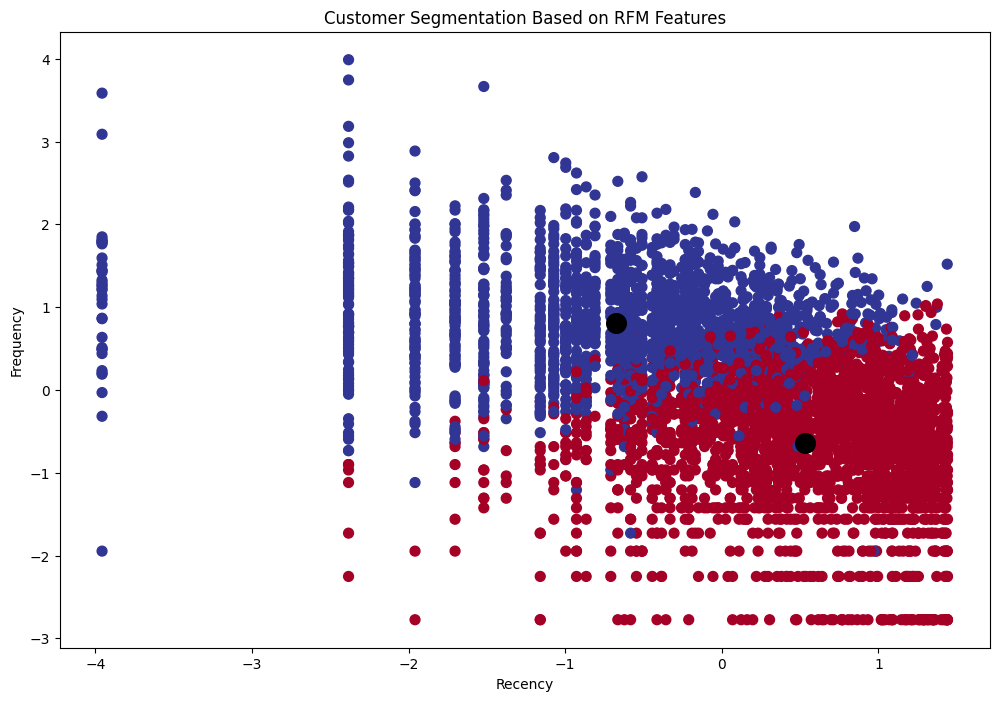

In [192]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# K-Means with Elbow method



[13013.999999999993, 6942.23808228403, 5350.1219564845105, 4550.621480099801, 3855.2193326517677, 3476.0716137915833, 3127.876994606843, 2889.7522622895067, 2705.3242575195973, 2543.4631655241274]


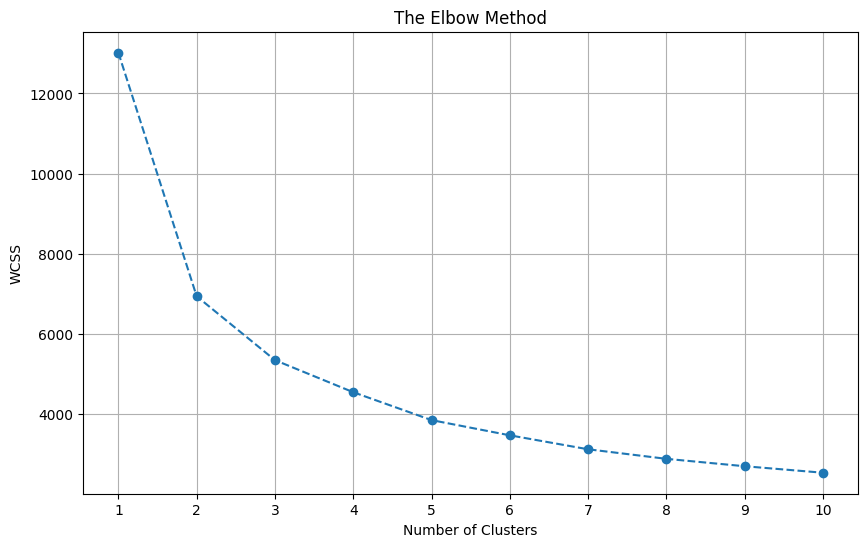

In [193]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters
print(wcss)
# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [194]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346,325,1,77183.60,1,1,4,114,1
1,12347,2,182,4310.00,4,4,4,444,0
2,12348,75,31,1797.24,2,2,4,224,1
3,12349,18,73,1757.55,3,3,4,334,0
4,12350,310,17,334.40,1,1,2,112,1
5,12352,36,85,2506.04,3,3,4,334,0
6,12353,204,4,89.00,1,1,1,111,1
7,12354,232,58,1079.40,1,3,3,133,1
8,12355,214,13,459.40,1,1,2,112,1
9,12356,22,59,2811.43,3,3,4,334,0


# Agglomerative Hierarchial Clustering

Agglomerative Hierarchical Clustering is a bottom-up approach that merges similar clusters until the desired number of clusters is achieved. It uses a distance/similarity measure between data points and can create a dendrogram to visualize the merging process. It captures hierarchical relationships but can be computationally expensive for large datasets and is not suitable for high-dimensional data.

In [195]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

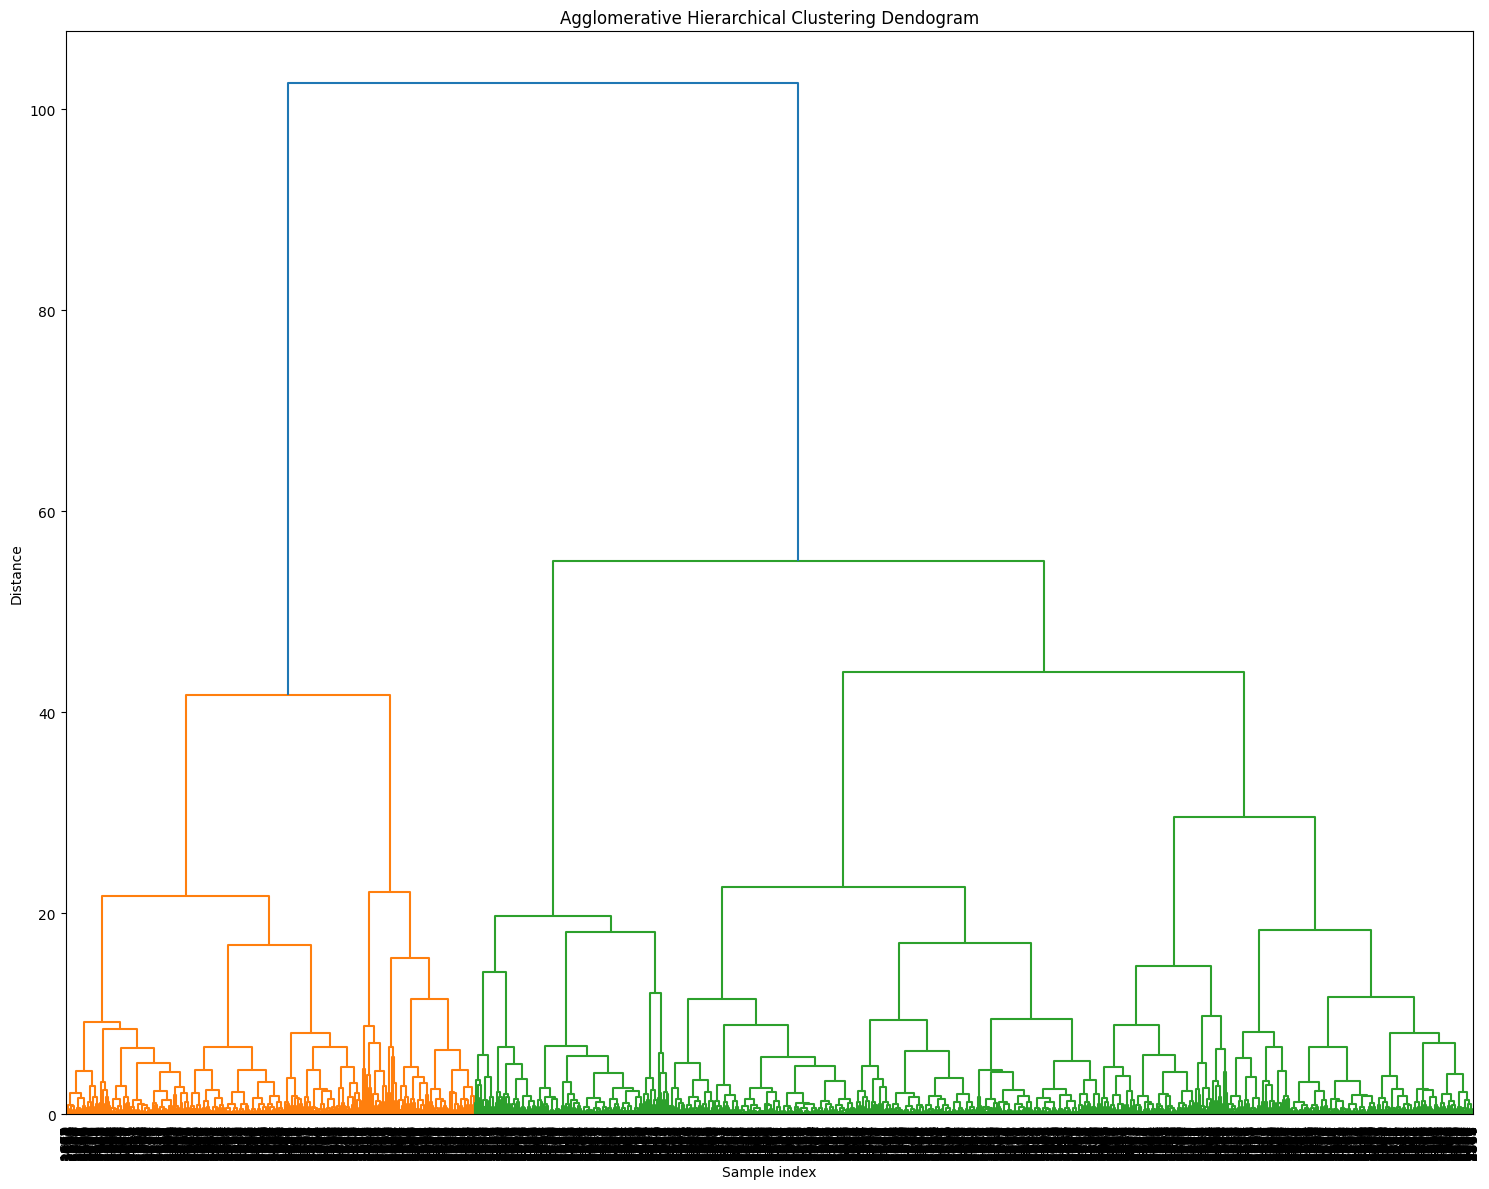

In [196]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

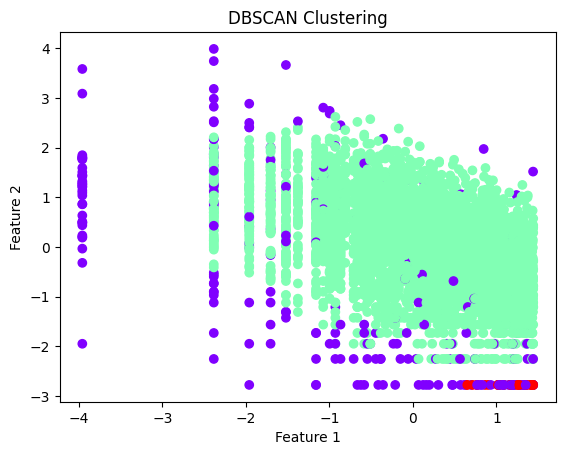

In [197]:
from sklearn.cluster import DBSCAN

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**# Conclusion**

**EDA**


* Null values and duplicates were removed from the dataset before applying clustering.

* Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

* The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

* The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

* The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

* New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.

* The total amount of each order was calculated using the product of unit price and quantity.

* The months of November, October, December, September, and May generated the most business.

* The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Sunday, and Friday.

* Most customers made purchases between 10:00 A.M. and 2:00 P.M.

* The top time duration for purchasing was found to be afternoon, followed by morning and evening.

**Algorithm**

* RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

* Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

  

  1. K-Means with Silhouette_score
  2.  K-Means with Elbow Method
  3.  Hierarchical Clustering
  4. DBSCAN
